In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

In [8]:
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
class_names = ['Tshirt' , 'trouser', 'Pullover', 'Dress' ,'Coat', 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot']
len(class_names)

10

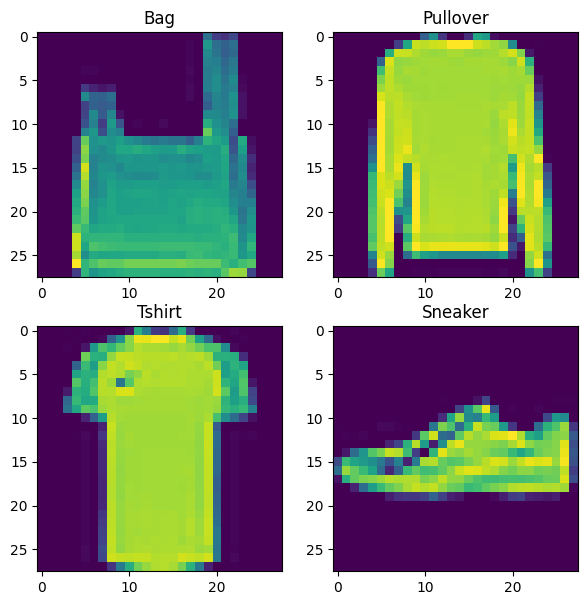

In [10]:
# Random images
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])


Normalizing the data

In [11]:
train_data.min() , train_data.max()

(0, 255)

In [12]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data/255.
test_data = test_data/255.

# Check the min and max values of the training data
train_data.min() , train_data.max()

(0.0, 1.0)

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history2 = model_2.fit(train_data, train_labels,epochs = 10 , validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0303 - accuracy: 0.6400 - val_loss: 0.6877 - val_accuracy: 0.7743
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6307 - accuracy: 0.7881 - val_loss: 0.6190 - val_accuracy: 0.7895
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5802 - accuracy: 0.8015 - val_loss: 0.5860 - val_accuracy: 0.7997
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5548 - accuracy: 0.8088 - val_loss: 0.5817 - val_accuracy: 0.8026
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5398 - accuracy: 0.8119 - val_loss: 0.5768 - val_accuracy: 0.7985
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5287 - accuracy: 0.8153 - val_loss: 0.5701 - val_accuracy: 0.8025
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5212 - accuracy: 0.8165 - val_loss: 0.5642 - val_accuracy

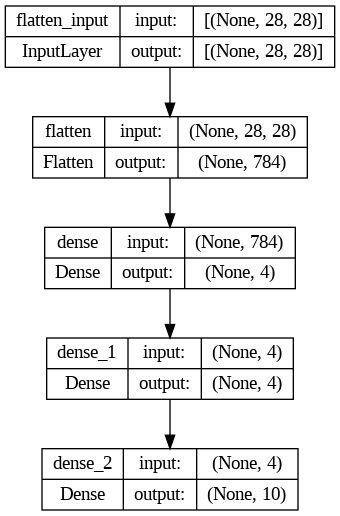

In [16]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_2, show_shapes=True)

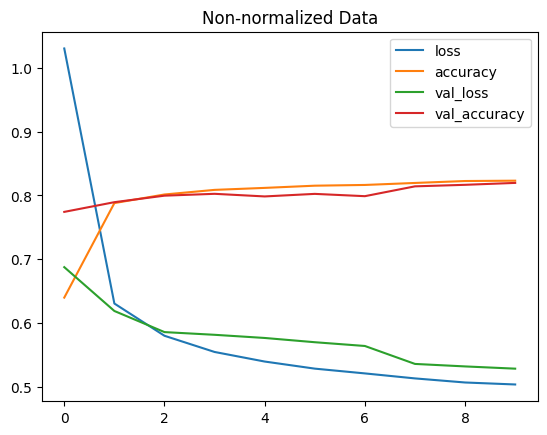

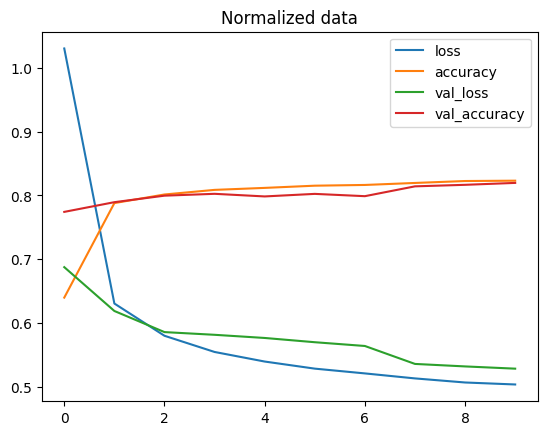

In [17]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history2.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history2.history).plot(title="Normalized data");

In [32]:
probability_model = tf.keras.Sequential([model_2,
                                         tf.keras.layers.Softmax()])


In [33]:
predictions = probability_model.predict(test_data)


313/313 [==============================] - 0s 1ms/step


In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


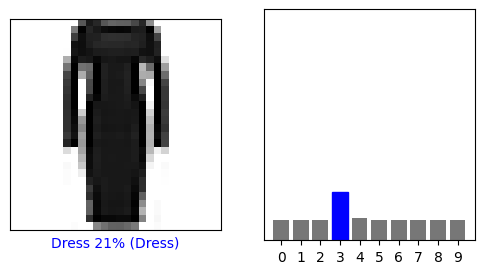

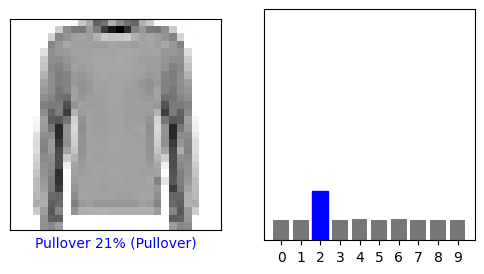

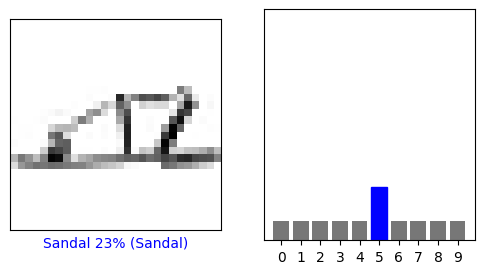

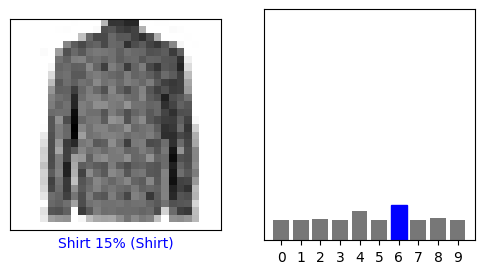

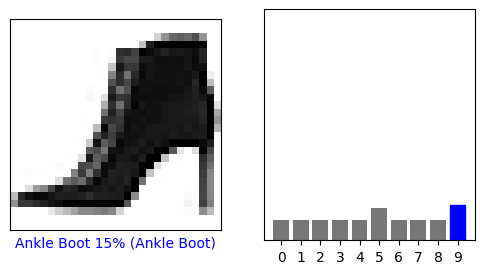

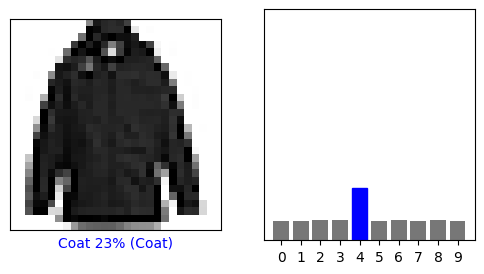

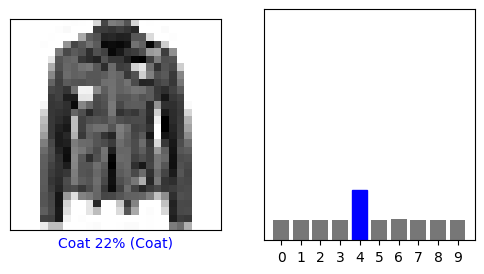

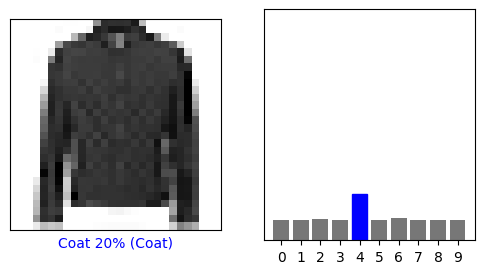

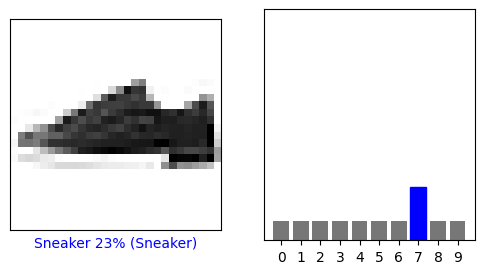

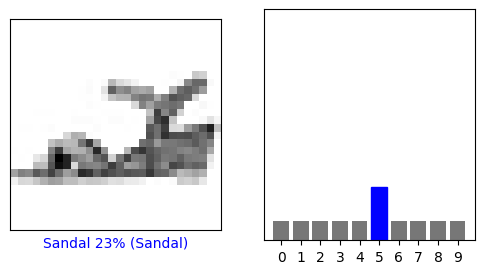

In [35]:
for a in range (10):
  i = random.randint(1,10000)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  a+=1
